In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (6.4,4.8),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})


In [18]:
import pandas as pd

s1 = pd.read_csv("/home/ABTLUS/victor.secco/data_processing/Eletroquímica/Chrono_-04V_verticalelectrodeNoFlux.txt", sep = '\t', decimal='.', skiprows=1)
#s2 = pd.read_csv("/home/ABTLUS/victor.secco/data_processing/Eletroquímica/Victor_test_19062024.txt", sep = ';')
s2

,Time (s),WE(1).Potential (V),Corrected time (s),Index,WE(1).Current (A)
0,5.397238,-0.239288,0.000000,1,-0.001959
1,10.397238,-0.397034,5.000000,2,-0.001959
2,15.397238,-0.412170,10.000000,3,-0.001958
3,20.397238,-0.408051,15.000000,4,-0.001959
4,25.397238,-0.405487,20.000000,5,-0.001958
...,...,...,...,...,...
16446,82235.397030,-0.704346,82229.999792,16447,-0.001959
16447,82240.397030,-0.704346,82234.999792,16448,-0.001959
16448,82245.397030,-0.704651,82239.999792,16449,-0.001959
16449,82250.397030,-0.705261,82244.999792,16450,-0.001959


/tmp/ipykernel_5671/3572973253.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=22).get_frame().set_linewidth(0.0)


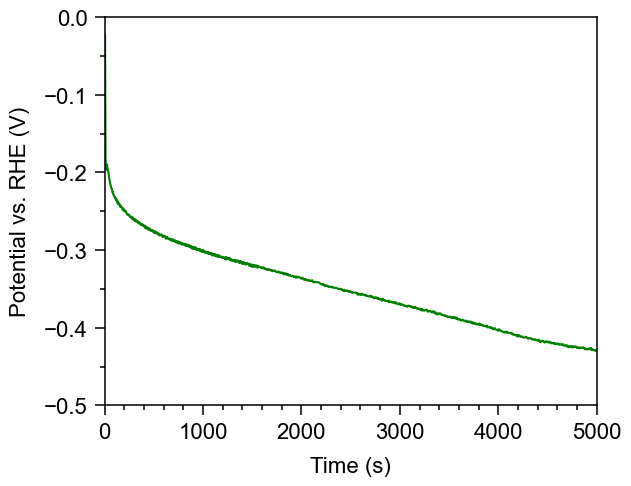

In [69]:
#plt.plot(s1["Corrected time (s)"].values, (s1["WE(1).Current (A)"].values)/s1["WE(1).Current (A)"][2]*100)
plt.plot(s2["Time (s)"].values, s2["WE(1).Potential (V)"].values + (0.198+0.059*0.3), color = 'green')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Potential vs. RHE (V)')
plt.legend(fontsize=22).get_frame().set_linewidth(0.0)
plt.xlim(0,5000)

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
#plt.savefig("/home/ABTLUS/victor.secco/data_processing/Eletroquímica/Figure_S8.png", dpi=500)
plt.show()

/tmp/ipykernel_5671/1750532670.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=22).get_frame().set_linewidth(0.0)


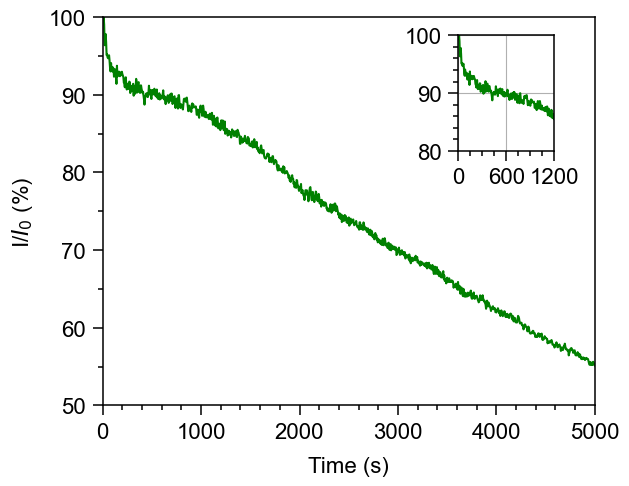

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
plt.plot(s1["Corrected time (s)"].values, 
         (s1["WE(1).Current (A)"].values)/s1["WE(1).Current (A)"][2]*100, color = 'green')

plt.xlabel(r'Time (s)')
plt.ylabel(r'I/$I_0$ (%)')
plt.legend(fontsize=22).get_frame().set_linewidth(0.0)
plt.xlim(0, 5000)
plt.ylim(50, 100)

# Minor ticks
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))

# Creating an inset with manual positioning
ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right",
                      bbox_to_anchor=(0.4, 0.15, 0.5, 0.8), bbox_transform=plt.gcf().transFigure)  # Adjust (0.75, 0.95, 1, 1) as needed

ax_inset.plot(s1["Corrected time (s)"].values, 
              (s1["WE(1).Current (A)"].values)/s1["WE(1).Current (A)"][2]*100, color = 'green')
ax_inset.set_xlim(0, 1200)
ax_inset.set_ylim(80, 100)  # adjust if necessary
ax_inset.set_xticks([0, 600, 1200])  # custom ticks for the inset
ax_inset.set_yticks([80, 90, 100])


# Optional: Add grid lines to the inset
ax_inset.grid(True)

plt.savefig("/home/ABTLUS/victor.secco/data_processing/Eletroquímica/Figure_S8.png", dpi=300)
# Show plot
plt.show()
